In [ ]:
# This project is about investigate a Baseball dataset and find if some variables are related
# The dataset is available on http://www.seanlahman.com/baseball-archive/statistics/

In [2]:
# Importing libs
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
"""Quality of Analysis"""
# Questions about data
# I would like to know if Salaries are related to Fame, I will analysis two files Salaries.csv and HallOfFame.csv

# Are just the players with big salaries in the Hall of Fame
# Do the salaries in the last 10 years increase more than total period

In [3]:
"""Data Wrangling Phase"""
# Changes that were made to clean the data, such as merging files, handling missing values

# read data into Pandas DataFrames
#salaries = pd.read_csv('Salaries.csv', index_col='playerID')
salaries = pd.read_csv('Salaries.csv')
hallOfFame = pd.read_csv('HallOfFame.csv')

# Verify missing values
print "salaries"
salaries.info()
print "Hall Of Fame"
hallOfFame.info()

salaries
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
yearID      26428 non-null int64
teamID      26428 non-null object
lgID        26428 non-null object
playerID    26428 non-null object
salary      26428 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.0+ MB
Hall Of Fame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4156 entries, 0 to 4155
Data columns (total 9 columns):
playerID       4156 non-null object
yearid         4156 non-null int64
votedBy        4156 non-null object
ballots        3961 non-null float64
needed         3804 non-null float64
votes          3961 non-null float64
inducted       4156 non-null object
category       4156 non-null object
needed_note    157 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 292.3+ KB


In [86]:
# Hall of Fame dataset has missing values in ballots, needed, votes and need_note columns, this analysis will ignore this missing
# values, because I only focus on general information about this dataset

# In order to merge two data sets I will change a column name in the Hall of Fame dataset
#change yearid in HallOfFame.csv to yearID
hallOfFame.columns = ['playerID','yearID','votedBy','ballots','needed','votes','inducted','category','needed_note']

# I going to concentrate my analysis in the last 10 years
# Analysis in the last 10 years
salariesLast10years = salaries[salaries.yearID > 2006]
hallOfFameLast10years = hallOfFame[hallOfFame.yearID > 2006]

# I will merge the salary dataset with the hall if fame dataset, to get the new dataset with only salary data of players in
# the hall of fame
# Merge the two tables
salaryJoinHallOfFame = salariesLast10years.merge(hallOfFameLast10years, on=['playerID'], how='inner')

teste = salariesLast10years[salariesLast10years['playerID'].isin(hallOfFameLast10years['playerID'])==True]

# Dataset with players that are not in the Hall of Fame last 10 years
salaryNotInHallOfFame10years = salariesLast10years[salariesLast10years['playerID'].isin(hallOfFameLast10years['playerID'])==False]

salariesLast10years.info()
hallOfFameLast10years.info()
teste.info()
salaryNotInHallOfFame10years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8315 entries, 18113 to 26427
Data columns (total 5 columns):
yearID      8315 non-null int64
teamID      8315 non-null object
lgID        8315 non-null object
playerID    8315 non-null object
salary      8315 non-null int64
dtypes: int64(2), object(3)
memory usage: 389.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 3799 to 4155
Data columns (total 9 columns):
playerID       357 non-null object
yearID         357 non-null int64
votedBy        357 non-null object
ballots        339 non-null float64
needed         339 non-null float64
votes          339 non-null float64
inducted       357 non-null object
category       357 non-null object
needed_note    0 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 27.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 18116 to 23173
Data columns (total 5 columns):
yearID      255 non-null int64
teamID      255 non-null object
lgID        255

Populating the interactive namespace from numpy and matplotlib


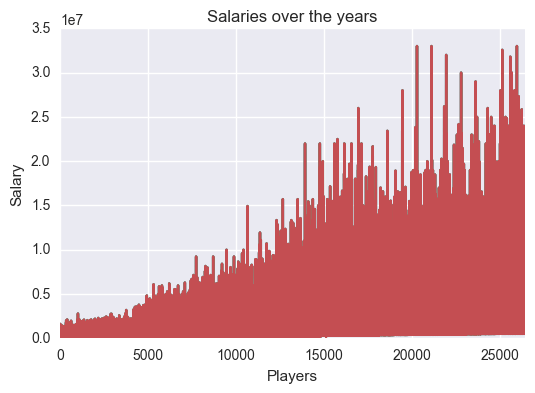

In [19]:
"""Exploration Phase"""
# Investigate the stated question(s) from multiple angles.

# Plotting the dataset, the salaries increases over the years
%pylab inline
salaries['salary'].plot().set_title('Salaries over the years')
salaries['salary'].plot().set_xlabel('Players')
salaries['salary'].plot().set_ylabel('Salary')

In [4]:
# Total stats from Salaries.csv
print ("Total stats")
print(salaries.groupby('yearID').sum()['salary'].describe())

print ("Last 10 years stats")
print(salariesLast10years.groupby('yearID').sum()['salary'].describe())

Total stats
count    3.200000e+01
mean     1.722473e+09
std      1.064078e+09
min      2.619647e+08
25%      8.776909e+08
50%      1.813399e+09
75%      2.669760e+09
max      3.750137e+09
Name: salary, dtype: float64
Last 10 years stats
count    1.000000e+01
mean     2.975600e+09
std      4.046194e+08
min      2.476689e+09
25%      2.693984e+09
50%      2.858623e+09
75%      3.152870e+09
max      3.750137e+09
Name: salary, dtype: float64


In [5]:
#Using stats library to compare total salaries and salaries last 10 years
slope10, intercept10, r_value10, p_value10, std_err10 = stats.linregress(salariesLast10years.yearID,salariesLast10years.salary)

last10yearsIndexDf = ['slope','intercept','r_value','p_value','std_err']

last10yearsStats = pd.DataFrame([slope10, intercept10, r_value10, p_value10, std_err10], index=last10yearsIndexDf, columns=['Stats last 10 years'])

print last10yearsStats

           Stats last 10 years
slope             1.589106e+05
intercept        -3.160676e+08
r_value           9.505133e-02
p_value           3.761616e-18
std_err           1.825345e+04


In [6]:
#Using stats library to compare total salaries and salaries last 10 years
slope, intercept, r_value, p_value, std_err = stats.linregress(salaries.yearID,salaries.salary)

totalIndexDf = ['slope','intercept','r_value','p_value','std_err']

totalStats = pd.DataFrame([slope, intercept, r_value, p_value, std_err], index=totalIndexDf, columns=['Stats total'])

print totalStats

            Stats total
slope      1.364173e+05
intercept -2.708687e+08
r_value    3.517400e-01
p_value    0.000000e+00
std_err    2.233331e+03


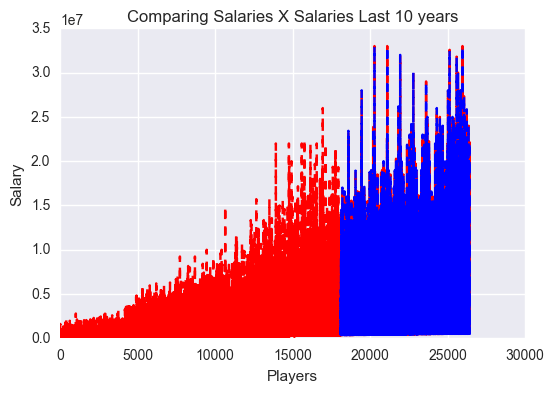

In [23]:
# Plot
# Using matplotlib and compare total slope and last 10 years slope
plt.title('Comparing Salaries X Salaries Last 10 years')
plt.xlabel('Players')
plt.ylabel('Salary')
plt.plot(salaries['salary'],'r--',salariesLast10years['salary'],'b--')

    

In [8]:
maxPlayerId = salaryJoinHallOfFame['salary'].argmax()
minPlayerId = salaryJoinHallOfFame['salary'].argmin()

print salaryJoinHallOfFame.iloc[[maxPlayerId]]
print " "
print salaryJoinHallOfFame.iloc[[minPlayerId]]

    yearID_x teamID lgID   playerID    salary  yearID_y votedBy  ballots  \
28      2009    LAN   NL  ramirma02  23854494      2017   BBWAA    442.0   

    needed  votes inducted category needed_note  
28   332.0  105.0        N   Player         NaN  
 
     yearID_x teamID lgID   playerID  salary  yearID_y votedBy  ballots  \
301      2010    CIN   NL  francju02  400000      2013   BBWAA    569.0   

     needed  votes inducted category needed_note  
301   427.0    6.0        N   Player         NaN  


In [10]:
# print max and min salary
print salaryJoinHallOfFame[salaryJoinHallOfFame['playerID']=='ramirma02']
print salaryJoinHallOfFame[salaryJoinHallOfFame['playerID']=='francju02']

    yearID_x teamID lgID   playerID    salary  yearID_y votedBy  ballots  \
26      2007    BOS   AL  ramirma02  17016381      2017   BBWAA    442.0   
27      2008    BOS   AL  ramirma02  18929923      2017   BBWAA    442.0   
28      2009    LAN   NL  ramirma02  23854494      2017   BBWAA    442.0   
29      2010    LAN   NL  ramirma02  18695006      2017   BBWAA    442.0   
30      2011    TBA   AL  ramirma02   2020000      2017   BBWAA    442.0   

    needed  votes inducted category needed_note  
26   332.0  105.0        N   Player         NaN  
27   332.0  105.0        N   Player         NaN  
28   332.0  105.0        N   Player         NaN  
29   332.0  105.0        N   Player         NaN  
30   332.0  105.0        N   Player         NaN  
     yearID_x teamID lgID   playerID  salary  yearID_y votedBy  ballots  \
301      2010    CIN   NL  francju02  400000      2013   BBWAA    569.0   
302      2011    CIN   NL  francju02  414000      2013   BBWAA    569.0   
303      2012    A

In [28]:
"""
salariesLast10years = 
hallOfFameLast10years = 
salaryJoinHallOfFame = 
salaryNotInHallOfFame10years = 
"""

# Compare the average salary off all hall of fame players and non hall of fame players
print 'Average Salary Hall of Fame players'
print salaryJoinHallOfFame['salary'].mean()
print 'Average Salary Non Hall of Fame players'
print salaryNotInHallOfFame10years['salary'].mean()

Average Salary Hall of Fame players
7338829.56066
Average Salary Non Hall of Fame players
3472237.21464


                salary     yearID_y     ballots      needed      votes
yearID_x                                                              
2007      7.716878e+06  2015.123894  509.823009  382.716814  99.584071
2008      8.766337e+06  2015.600000  495.637500  372.087500  90.850000
2009      6.813217e+06  2016.056604  476.169811  357.415094  69.773585
2010      5.584742e+06  2016.485714  444.828571  333.914286  55.971429
2011      4.724304e+06  2016.750000  448.250000  336.650000  39.550000
2012      4.493333e+06  2014.333333  526.666667  395.333333   2.000000
2013      4.962500e+05  2013.000000  569.000000  427.000000   6.000000


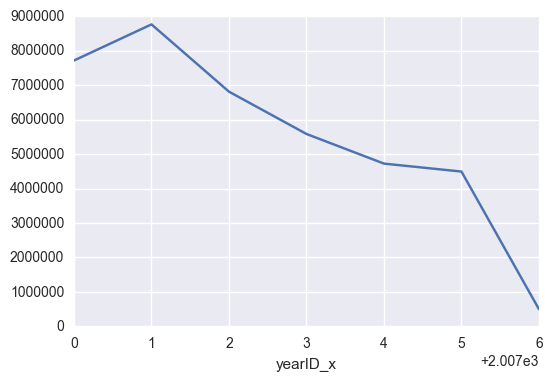

In [78]:
# Salary Hall fo Fame over the years
"""salaryJoinHallOfFame['salary'].plot().set_title('Salaries over the years Hall Of Fame Players')
salaryJoinHallOfFame['salary'].plot().set_xlabel('Players')
salaryJoinHallOfFame['salary'].plot().set_ylabel('Salary')
salaryJoinHallOfFame.plot()
"""
salaryHallOfFamegroupbyYear = salaryJoinHallOfFame.groupby('yearID_x').mean()
print salaryHallOfFamegroupbyYear
salaryHallOfFamegroupbyYear['salary'].plot()
#print salaryJoinHallOfFame.groupby(['yearID_x'])
#salaryJoinHallOfFame.plot(x='yearID_x',y='salary')
#plt.scatter(salaryJoinHallOfFame['yearID_x'],salaryJoinHallOfFame['salary'])
#plt.show()
#plt.xticks(salaryJoinHallOfFame['yearID_x'],salaryJoinHallOfFame['salary'])
#plt.plot(salaryJoinHallOfFame['yearID_x'])
#salaries = pd.read_csv('Salaries.csv', index_col='playerID')
#teste =  salaryJoinHallOfFame.set_index(salaryJoinHallOfFame['yearID_x'])
#teste['salary'].plot()

         salary
yearID         
2007    2466473
2008    2692710
2009    3070753
2010    3187131
2011    3284516
2012    3454746
2013    3727308
2014    3980445
2015    4301276
2016    4396409


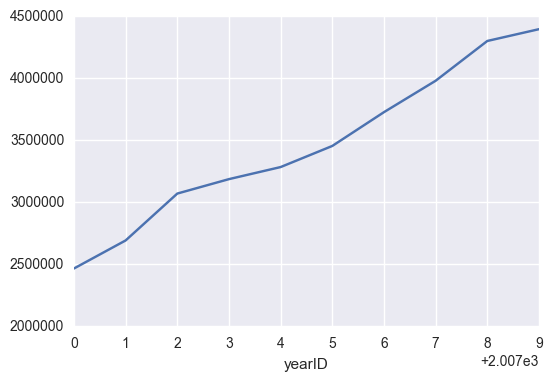

In [84]:
"""
salaryNotInHallOfFame10years['salary'].plot().set_title('Salaries over the years Non Hall Of Fame Players')
salaryNotInHallOfFame10years['salary'].plot().set_ylabel('Salary')
salaryNotInHallOfFame10years['salary'].plot().set_xlabel('Players')
salaryNotInHallOfFame10years['salary'].plot()
"""
salaryNonHallOfFamegroupbyYear = salaryNotInHallOfFame10years.groupby('yearID').mean()
print salaryNonHallOfFamegroupbyYear
salaryNonHallOfFamegroupbyYear['salary'].plot()

In [63]:
"""Conclusions Phase"""

""""
Comparing the values in the statistics, in the last 10 years the slope is grater than the total years, meaning that the salaries
increase more.

playerID francju02 with the min salary is in the hall of fame table as ramirma02 with the max salary, this data is interresting
because not only players with big salary  are in the hall of fame but also small salary.

""""

SyntaxError: EOL while scanning string literal (<ipython-input-63-6c4d906e0487>, line 10)

In [ ]:
"""Communication"""
"""The flow of the analysis"""
# Choose the dataset: Baseball Data (http://www.seanlahman.com/baseball-archive/statistics/)
# State one or more questions about the data
# Clean the data, merging, changing column name and other changes
# Explore the data using statistics, plot
# Conclusion about questions stated

In [ ]:
# References

# https://docs.scipy.org/doc/scipy-0.18.1/reference/stats.html
# https://classroom.udacity.com/nanodegrees/nd002